<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
binomial_p(n, k, p) = factorial(n)/(factorial(k)*factorial(n-k))*p^k*(1-p)^(n-k)

binomial_p (generic function with 1 method)

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [38]:
win_p = binomial_p(10,5,0.4);

The chance of losing the bet:

In [39]:
lose_p = sum(binomial_p.(10,[0,1,2,3,4,6,7,8,9,10],0.4));

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [41]:
expected_outcome = win_p*30-lose_p*10;

-1.9736750079999998

Lose money due to a negative expected value

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities? 

2. Would you expect yourself earning or losing money in this case?

In [13]:
win_p = binomial_p(10,4,0.4);
lose_p = sum(binomial_p.(10,[0,1,2,3,5,6,7,8,9,10],0.4));
expected_outcome = win_p*30-lose_p*10;

Earn money due to a positive expected value

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [14]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [15]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [16]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [17]:
line_fit = Polynomials.fit(x,y_observed,1)
fit_coeff = Polynomials.coeffs(line_fit);

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [18]:
function chisqr(b, m, x, y_observed, sigma)
    return sum((y_observed .- (m .* x .+ b)).^2/sigma^2)
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting in the previous steps 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [19]:
chi2_list = []
for i in 1:10000
    y_true = 3 .* x .- 2
    sigma = 3
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    line_fit = Polynomials.fit(x,y_observed,1)
    fit_coeff = Polynomials.coeffs(line_fit)
    push!(chi2_list,chisqr(fit_coeff[1], fit_coeff[2], x, y_observed, sigma))
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [20]:
Statistics.mean(chi2_list)

9.050913289212012

Yes, the mean chi-square value should represent the degree of freedom of the model, which can be represented by number of independent datapoints - number of parameters

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Plot the chi2_list in a histogram with bin = 50
4. Calculate pdf of the Chi-square distribution using x_dist
5. Plot the pdf on top of the chi2_list histogram 

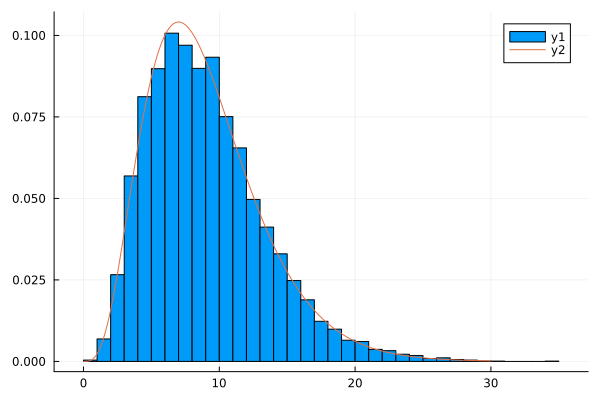

In [22]:
x_dist = 0:0.1:30
chi2 = di.Chisq(9)
Plots.histogram(chi2_list, bin=50, normalize=true)
Plots.plot!(x_dist, di.pdf.(chi2,x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the coefficients as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [23]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

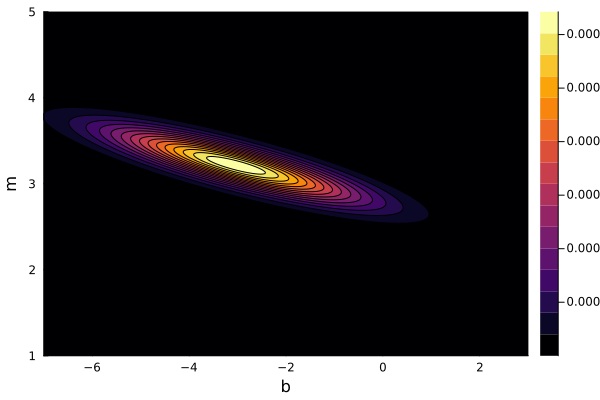

In [28]:
x = 0:1:10
m_range = 1:0.01:5
b_range = -7:0.01:3
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

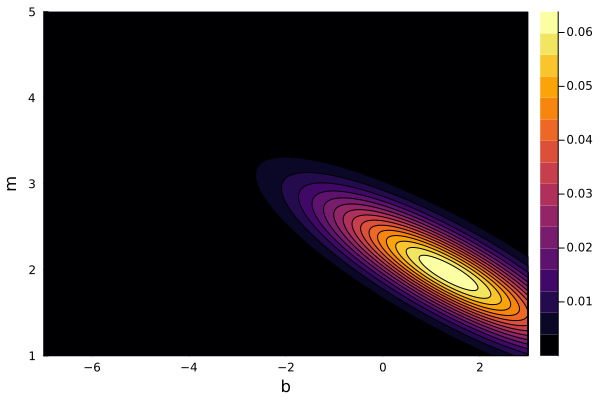

In [29]:
x = 0:0.5:5
m_range = 1:0.01:5
b_range = -7:0.01:3
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

It is harder to extimate the slope when the x range is smaller so the distribution is wider in the m direction

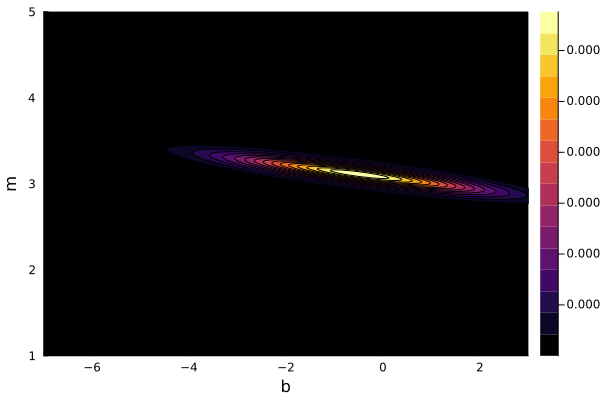

In [30]:
x = 0:2:20
m_range = 1:0.01:5
b_range = -7:0.01:3
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

It is easier to extimate the slope when the x range is bigger so the distribution is narrower in the m direction

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

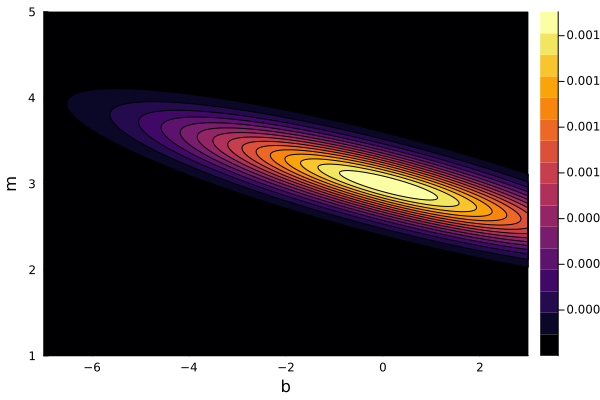

In [34]:
x = 0:1:10
m_range = 1:0.01:5
b_range = -7:0.01:3
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The distribution is wider in both directions since a higher noise level impedes the estimation of true parameters

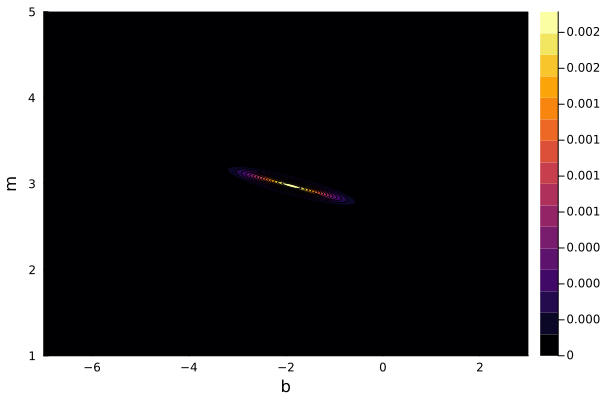

In [35]:
x = 0:1:10
m_range = 1:0.01:5
b_range = -7:0.01:3
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The distribution is narrower in both directions since a lower noise level decrease uncertainty in parameter estimation